<a href="https://colab.research.google.com/github/cut-lip/ML_Practice/blob/main/LinearRegression_1990Census.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required modules

import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# Execute these pandas functions to adjust the "granularity" of reporting
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

####Let's talk about csv files. A properly formatted csv file should have a first row of column labels followed by tuples of data in the following rows. A csv file's data may be gathered and used to construct a pandas DataFrame. This is the main datatype in pandas, which is a popular open source Python data science library. A dataframe is bsaically an entity table (Note: pandas is built on NumPy).

###So, we will first want to input our csv data to a pasdas DataFrame.

In [ ]:
# Import dataset
training_df = pd.read_csv(filepath_or_buffer = "https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Properly scale the label (scale housing values to units of thousands)
# (scaling helps to both reduce loss values and proporly adjust learning rates)
training_df["median_house_value"] = 1000.0

# Print the head of the pandas DataFrame
training_df.head

<bound method NDFrame.head of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0         -114.3      34.2                15.0       5612.0          1283.0   
1         -114.5      34.4                19.0       7650.0          1901.0   
2         -114.6      33.7                17.0        720.0           174.0   
3         -114.6      33.6                14.0       1501.0           337.0   
4         -114.6      33.6                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995     -124.3      40.6                52.0       2217.0           394.0   
16996     -124.3      40.7                36.0       2349.0           528.0   
16997     -124.3      41.8                17.0       2677.0           531.0   
16998     -124.3      41.8                19.0       2672.0           552.0   
16999     -124.3      40.5                52.0       1820.0           300.0   

       population  ho

###The pandas `describe()` function is a useful way to examine a dataset contained by a pandas DataFrame. This function outputs statistics about eac hindividual column in a DataFrame.

In [ ]:
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,1000.0
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,0.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,1000.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,1000.0
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,1000.0
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,1000.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,1000.0


###Can we identify any anomalies in the data set? It does seem like the max of total_rooms is surprisingly high given the other values in the row.

In [ ]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the build_model and train_model functions.")


#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = 10000
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the build_model and train_model functions.
Defined the plot_the_model and plot_the_loss_curve functions.


###Generally speaking, an important problem in Machine Learning is determining which features correlate with the label. In this case, we will only consider the feature of `total_rooms` as input for determining the label (this is arbirtrary).

Epoch 1/30
567/567 [==============================] - 2s 2ms/step - loss: 444809.5938 - root_mean_squared_error: 666.9405
Epoch 2/30
567/567 [==============================] - 1s 2ms/step - loss: 404852.5312 - root_mean_squared_error: 636.2802
Epoch 3/30
567/567 [==============================] - 1s 2ms/step - loss: 398491.3125 - root_mean_squared_error: 631.2617
Epoch 4/30
567/567 [==============================] - 1s 2ms/step - loss: 395916.9688 - root_mean_squared_error: 629.2194
Epoch 5/30
567/567 [==============================] - 1s 2ms/step - loss: 389984.0000 - root_mean_squared_error: 624.4870
Epoch 6/30
567/567 [==============================] - 1s 2ms/step - loss: 385292.0625 - root_mean_squared_error: 620.7190
Epoch 7/30
567/567 [==============================] - 1s 2ms/step - loss: 381495.7188 - root_mean_squared_error: 617.6534
Epoch 8/30
567/567 [==============================] - 1s 2ms/step - loss: 378865.0938 - root_mean_squared_error: 615.5202
Epoch 9/30
567/567 [====

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


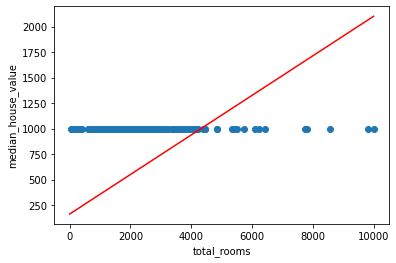

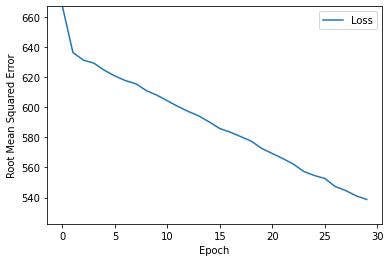

In [ ]:
# Define hyperparameters
learning_rate = 0.01
epochs = 30
batch_size = 30

# Specify the feature and the label:
# This feature represents the total number of rooms on a city block
my_feature = "total_rooms" 
# This is the median value of a home on a city block
my_label = "median_house_value"
# Thus, the model will predict median home value based on total_rooms

# Discard any preexisting version of the model
my_model = None

# Invoke the functions
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model,
                                         training_df,
                                         my_feature,
                                         my_label,
                                         epochs,
                                         batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

###Although randomness plays into the training of the dataset, this combination of hyperparameters will generally provide a poor model. Now that we've trained the model (poor as it may be), we can use it to make predictions on new data.

In [ ]:
def predict_house_values(n, feature, label):
  """Predict house values based on a feature."""

  batch = training_df[feature][10000:10000 + n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature   label          predicted")
  print("  value   value          value")
  print("          in thousand$   in thousand$")
  print("--------------------------------------")
  for i in range(n):
    print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                   training_df[label][10000 + i],
                                   predicted_values[i][0] ))

In [ ]:
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1960   1000             543
 3400   1000             822
 3677   1000             876
 2202   1000             590
 2403   1000             629
 5652   1000            1258
 3318   1000             806
 2552   1000             658
 1364   1000             428
 3468   1000             835


###It is clear that most of the predicted values are significantly different than the actual labels for the features, thus, we may consider our model to have low predictive power.

###This is a good incentive to try training the model on a different feature and/or with different hyperparameters.

Epoch 1/40


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


3400/3400 [==============================] - 7s 2ms/step - loss: 364709.5625 - root_mean_squared_error: 603.9119
Epoch 2/40
3400/3400 [==============================] - 6s 2ms/step - loss: 276385.1250 - root_mean_squared_error: 525.7234
Epoch 3/40
3400/3400 [==============================] - 6s 2ms/step - loss: 196823.7969 - root_mean_squared_error: 443.6483
Epoch 4/40
3400/3400 [==============================] - 8s 2ms/step - loss: 131106.5625 - root_mean_squared_error: 362.0864
Epoch 5/40
3400/3400 [==============================] - 7s 2ms/step - loss: 79614.5625 - root_mean_squared_error: 282.1605
Epoch 6/40
3400/3400 [==============================] - 7s 2ms/step - loss: 40291.0195 - root_mean_squared_error: 200.7262
Epoch 7/40
3400/3400 [==============================] - 6s 2ms/step - loss: 19079.7871 - root_mean_squared_error: 138.1296
Epoch 8/40
3400/3400 [==============================] - 6s 2ms/step - loss: 6178.1079 - root_mean_squared_error: 78.6009
Epoch 9/40
3400/3400 [===

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


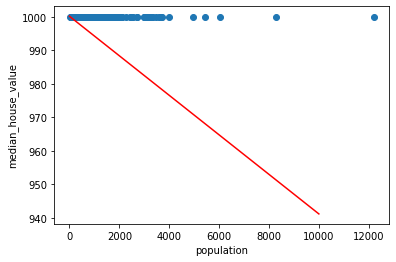

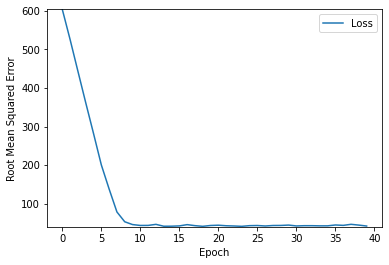

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1286   1000             993
 1867   1000             989
 2191   1000             987
 1052   1000             994
 1647   1000             990
 2312   1000             986
 1604   1000             991
 1066   1000             994
  338   1000             998
 1604   1000             991
 1200   1000             993
  292   1000             998
 2014   1000             988
 1817   1000             989
 1328   1000             992


In [ ]:
# Train the model on "population" feature
my_feature = "population"

# Experiment with the hyperparameters.
learning_rate = 0.05
epochs = 40
batch_size = 5

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)
plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(15, my_feature, my_label)

###Okay, so although the loss seemed to be improving significantly at first, it ended up converging very poorly (also 40 epochs took an annoying long time to complete, the loss rate converged ata round 18 epochs).

###Perhaps it would be more productive to define a synthetic feature from the ratio of total_rooms to population, or the block population density

Epoch 1/24


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


567/567 [==============================] - 2s 3ms/step - loss: 902931.0000 - root_mean_squared_error: 950.2268
Epoch 2/24
567/567 [==============================] - 1s 2ms/step - loss: 724560.2500 - root_mean_squared_error: 851.2111
Epoch 3/24
567/567 [==============================] - 1s 2ms/step - loss: 571255.7500 - root_mean_squared_error: 755.8146
Epoch 4/24
567/567 [==============================] - 1s 2ms/step - loss: 443205.6562 - root_mean_squared_error: 665.7369
Epoch 5/24
567/567 [==============================] - 1s 2ms/step - loss: 341330.6562 - root_mean_squared_error: 584.2351
Epoch 6/24
567/567 [==============================] - 1s 2ms/step - loss: 260898.8125 - root_mean_squared_error: 510.7826
Epoch 7/24
567/567 [==============================] - 1s 2ms/step - loss: 202294.2656 - root_mean_squared_error: 449.7714
Epoch 8/24
567/567 [==============================] - 1s 2ms/step - loss: 161857.5469 - root_mean_squared_error: 402.3152
Epoch 9/24
567/567 [===============

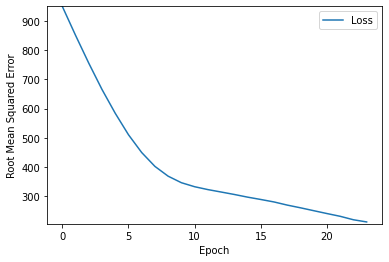

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2   1000             901
    2   1000             953
    2   1000             928
    2   1000            1001
    1   1000             890
    2   1000            1063
    2   1000             997
    2   1000            1054
    4   1000            1343
    2   1000            1013
    2   1000            1058
    3   1000            1104
    2   1000            1062
    2   1000            1036
    2   1000             998


In [ ]:
# Define a synthetic feature named rooms_per_person
training_df["rooms_per_person"] = training_df["total_rooms"] / training_df["population"]
my_feature = "rooms_per_person"

# Don't change the next line.
my_feature = "rooms_per_person"

# Assign values to these three hyperparameters.
learning_rate = 0.06
epochs = 24
batch_size = 30

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_loss_curve(epochs, rmse)
predict_house_values(15, my_feature, my_label)

###Okay, so this model wasn't so great either. Trial-and-error doesn't really seem to do the trick. We can do a statistical method instead by making use of a correlation matrix.

###A correlation matrix indicates how each attribute's raw values relate to the other attribute's raw values. Correlation values have the following meanings:

*   `1.0`: this is a perfect positive correlation: one attribute rises, the other falls
*   `-1.0`: this is a perfect negative correlation: one attribute rises, the other falls
*   `0.0`: no correlation, the two columns are not linearly related

###Generally speaking, the higher the absolute value of a correlation value, the greater its predictive power.





In [ ]:
#Generate a correlation matrix
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,NaN,-0.1
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,NaN,0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,NaN,-0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,NaN,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,NaN,0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,NaN,-0.1
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,NaN,-0.0
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,NaN,0.2
median_house_value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rooms_per_person,-0.1,0.1,-0.1,0.1,0.0,-0.1,-0.0,0.2,NaN,1.0
